## Лабораторная работа №3. Частотный анализ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

### Загрузка данных

In [2]:
all_data = pd.read_csv('datasets/dataset_group.csv', header=None, names=['date', 'id', 'product'])

In [3]:
all_data

,date,id,product
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


Список id всех покупателей

In [4]:
unique_id = list(set(all_data['id']))
print(len(unique_id)) # Выведем количество id

1139


Список всех товаров

In [5]:
items = list(set(all_data['product']))
print(len(items)) # Выведем количество товаров

38


Подготовка датасета для частотного анализа. Слияние товаров одного покупателя в один список

In [6]:
dataset = [[i for i in all_data[all_data['id'] == j]['product'] if i in items] for j in unique_id]

### Подготовка данных

Кодирование с использованием TransactionEncoder

In [7]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


### Ассоциативный анализ с использованием алгоритма Apriori

Алгоритм apriori с минимальным уровнем поддержки 0.3

In [9]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # Добавление размера набора print(results)
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


Алгоритм apriori с тем же уровнем поддержки, но с ограниченным максимальным размером набора единиц

In [10]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


Алгоритм apriori с выводом наборов, которые имеют размер 2, а также количество таких наборов

In [11]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ', len(results))

     support                                    itemsets  length
38  0.310799                 (vegetables, aluminum foil)       2
39  0.300263                        (vegetables, bagels)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (vegetables, cheeses)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (vegetables, eggs)       2
45  0.302897                     (vegetables, ice cream)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (vegetables, lunch meat)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (vegetables, soda)       2
50  0.315189                       (vegetables, waffles)       2
51  0.319579                        (vegetables, yogurt)       2

Count of result itemstes

Количество наборов при различных уровнях поддержки. Начальное значение поддержки 0.05, шаг 0.01

In [12]:
items = np.array([])
levels = np.array([])
max_len = None

for i in np.arange(0.05, 1, 0.01):
    results = apriori(df, min_support=i)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    if max_len is None:
        max_len = results.max()['length']
    elif results.max()['length'] < max_len:
        max_len = results.max()['length']
        levels = np.append(i, levels)
    items = np.append(items, len(results))

График зависимости количества наборов от уровня поддержки

Значение уровня поддержки, при котором перестают генерироваться наборы размера 1,2,3, и т. д.

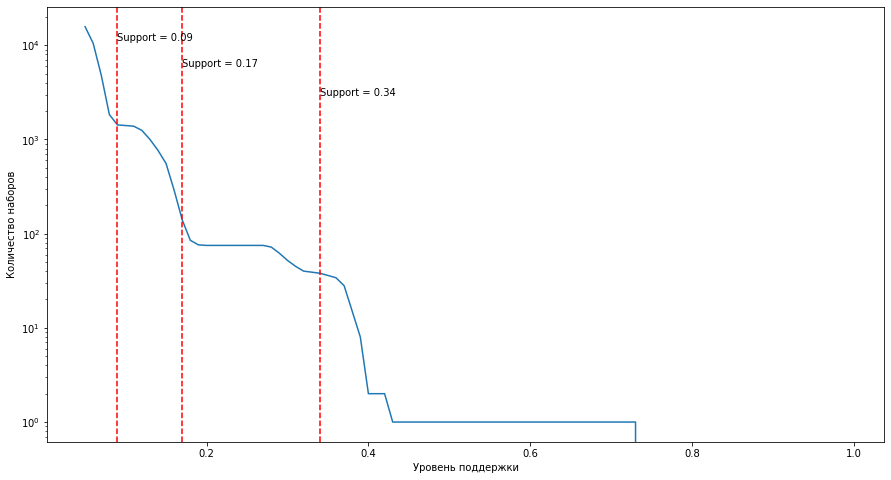

In [13]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(0.05, 1, 0.01), items)
for i in range(len(levels)):
    plt.axvline(x=levels[i], color='red', ls = '--')
    plt.annotate(f'Support = {round(levels[i], 2)}', xy=(levels[i], 1000/levels[i]))
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.yscale('log')
plt.show()

Датасет только из тех элементов, которые попадают в наборы размером 1 при уровне поддержки 0.38

In [14]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[i for i in all_data[all_data['id'] == j]['product'] if i in new_items] for j in unique_id]
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


Приведение полученного датасета к формату, который можно обработать

In [15]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)

Ассоциативный анализ при уровне поддержки 0.3 для нового датасета

In [16]:
new_results = apriori(new_df, min_support=0.3, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x))
new_results

,support,itemsets,length
0,0.384548,(aluminum foil),1
1,0.385426,(bagels),1
2,0.395961,(cereals),1
3,0.390694,(cheeses),1
4,0.388938,(dinner rolls),1
5,0.388060,(dishwashing liquid/detergent),1
6,0.389816,(eggs),1
7,0.398595,(ice cream),1
8,0.395083,(lunch meat),1
9,0.380158,(milk),1


In [17]:
new_results = apriori(new_df, min_support=0.15, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x))
cond = new_results.apply(lambda x: x['length'] > 1 and ('yogurt' in x['itemsets'] or 'waffles' in x['itemsets']), axis=1)
new_results = new_results[cond]
new_results

,support,itemsets,length
27,0.169447,"(aluminum foil, waffles)",2
28,0.177349,"(aluminum foil, yogurt)",2
40,0.159789,"(waffles, bagels)",2
41,0.162423,"(yogurt, bagels)",2
52,0.160667,"(waffles, cereals)",2
53,0.172081,"(yogurt, cereals)",2
63,0.172959,"(waffles, cheeses)",2
64,0.172081,"(yogurt, cheeses)",2
73,0.169447,"(waffles, dinner rolls)",2
74,0.166813,"(yogurt, dinner rolls)",2


Датасет из тех элементов, которые не попали в датасет в п.6

In [18]:
new_dataset_2 = [[i for i in all_data[all_data['id'] == j]['product'] if i not in new_items] for j in unique_id]
te_ary = te.fit(new_dataset_2).transform(new_dataset_2)
df_new_2 = pd.DataFrame(te_ary, columns=te.columns_)

In [19]:
new_results = apriori(df_new_2, min_support=0.3, use_colnames=True)
new_results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


Правило для вывода всех наборов, в которых хотя бы два элемента начинаются на 's'

In [20]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(df, min_support=0.1, use_colnames=True)

In [21]:
new_results = results[results['itemsets'] \
                          .apply(lambda x: len([word for word in x if word.startswith('s')]) > 1)]
new_results

,support,itemsets
675,0.137840,"(sandwich loaves, sandwich bags)"
676,0.146620,"(shampoo, sandwich bags)"
677,0.158911,"(soap, sandwich bags)"
678,0.162423,"(sandwich bags, soda)"
679,0.147498,"(spaghetti sauce, sandwich bags)"
680,0.131694,"(sugar, sandwich bags)"
686,0.150132,"(shampoo, sandwich loaves)"
687,0.158033,"(soap, sandwich loaves)"
688,0.141352,"(sandwich loaves, soda)"
689,0.150132,"(spaghetti sauce, sandwich loaves)"


Правило, для вывода всех наборов, для которых уровень поддержки изменяется от 0.1 до 0.25

In [22]:
new_results = results[results['support'].apply(lambda x: 0.1 <= x <= 0.25)]
new_results

,support,itemsets
38,0.157155,"(all- purpose, aluminum foil)"
39,0.150132,"(all- purpose, bagels)"
40,0.144864,"(all- purpose, beef)"
41,0.147498,"(all- purpose, butter)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(vegetables, waffles, toilet paper)"
1402,0.130817,"(vegetables, yogurt, toilet paper)"
1403,0.121159,"(vegetables, tortillas, waffles)"
1404,0.130817,"(vegetables, tortillas, yogurt)"
